In [54]:
# Get ImageNet predtrained VGG16 backbone for feature extraction
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
 include_top=False,
 input_shape=(300, 300, 3))

In [56]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 9, 9, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               10617088  
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 1542      
Total params: 25,333,318
Trainable params: 25,333,318
Non-trainable params: 0
_________________________________________________________________


In [58]:
print('This is the number of trainable weights '
 'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [59]:
# Freeze VGG weights then train last fully-connected layer and classification layer
conv_base.trainable = False

In [60]:
print('This is the number of trainable weights '
 'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 4


In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 9, 9, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               10617088  
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 1542      
Total params: 25,333,318
Trainable params: 10,618,630
Non-trainable params: 14,714,688
_________________________________________________________________


In [62]:
train_dir = r'C:\Users\sondors\Desktop\hack\set\classes_split\classes_folders\train'
test_dir = r'C:\Users\sondors\Desktop\hack\set\classes_split\classes_folders\test'

In [63]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# Set data generators, augmentation modes and train/test split
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
 train_dir,
 target_size=(300, 300),
 batch_size=10,
 class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
 test_dir,
 target_size=(300, 300),
 batch_size=10,
 class_mode='categorical')

# Compile the model and train
model.compile(loss='categorical_crossentropy',
 optimizer=optimizers.RMSprop(lr=2e-5),#optimizer='rmsprop'
 metrics=['accuracy'])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

history = model.fit_generator(
 train_generator,
 steps_per_epoch=STEP_SIZE_TRAIN,
 epochs=3,
 validation_data=test_generator,
 validation_steps=STEP_SIZE_TEST)

Found 3809 images belonging to 6 classes.
Found 120 images belonging to 6 classes.
Epoch 1/3
380/380 [==============================] - 94s 248ms/step - loss: 0.4425 - accuracy: 0.8631 - val_loss: 0.3874 - val_accuracy: 0.8833
Epoch 2/3
380/380 [==============================] - 64s 169ms/step - loss: 0.2091 - accuracy: 0.9347 - val_loss: 0.0472 - val_accuracy: 0.9083
Epoch 3/3
380/380 [==============================] - 62s 162ms/step - loss: 0.1865 - accuracy: 0.9402 - val_loss: 0.5611 - val_accuracy: 0.9083


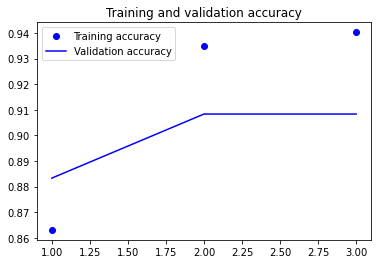

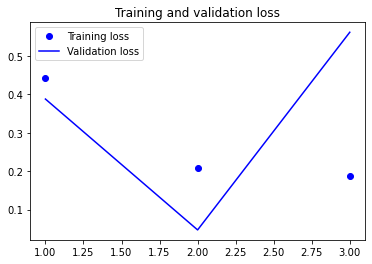

In [65]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [81]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r'C:\Users\sondors\Desktop\hack\set\classes_split\classes_folders\val\5.jpg'
img = image.load_img(img_path, target_size=(300, 300))

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

x = model.predict(img_batch)

In [82]:
x

array([[0., 0., 0., 0., 1., 0.]], dtype=float32)

In [68]:
model.save('6_class_last_layer.h5')

In [69]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [70]:
for layer in conv_base.layers:
    print(layer.name)

input_3
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [71]:
# Unfreeze last 3 conv layers then do fine-tuning of the model
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [72]:
model.compile(loss='categorical_crossentropy',
 optimizer=optimizers.RMSprop(lr=1e-5),
 metrics=['accuracy'])

history = model.fit_generator(
 train_generator,
 steps_per_epoch=STEP_SIZE_TRAIN,
 epochs=100,
 validation_data=test_generator,
 validation_steps=STEP_SIZE_TEST)

Epoch 1/100
380/380 [==============================] - 76s 201ms/step - loss: 0.1601 - accuracy: 0.9537 - val_loss: 0.3445 - val_accuracy: 0.9250
Epoch 2/100
380/380 [==============================] - 72s 188ms/step - loss: 0.1174 - accuracy: 0.9618 - val_loss: 0.0091 - val_accuracy: 0.9500
Epoch 3/100
380/380 [==============================] - 72s 188ms/step - loss: 0.0913 - accuracy: 0.9697 - val_loss: 0.2538 - val_accuracy: 0.9500808 - - ETA: 3s - loss: 0.0903  - ETA: 1s - loss: 0.0886 - 
Epoch 4/100
380/380 [==============================] - 71s 188ms/step - loss: 0.0855 - accuracy: 0.9739 - val_loss: 0.0781 - val_accuracy: 0.9583 - ac - ETA: 
Epoch 5/100
380/380 [==============================] - 72s 188ms/step - loss: 0.0778 - accuracy: 0.9760 - val_loss: 0.0108 - val_accuracy: 0.9583
Epoch 6/100
380/380 [==============================] - 72s 188ms/step - loss: 0.0603 - accuracy: 0.9787 - val_loss: 0.0154 - val_accuracy: 0.9583A: 46s - loss: 0 - ETA: 25s - loss: 0.0570 - accuracy

380/380 [==============================] - 72s 188ms/step - loss: 0.0146 - accuracy: 0.9966 - val_loss: 2.9802e-07 - val_accuracy: 0.9750ss: 0.0164 - a - ETA: 23s - loss: 0.0149 - accurac -  - ETA: 13s - loss: 0.0181 - accurac - ETA: 12s - loss: 0.0176 - accuracy: 0.9 - ETA: 11s - loss: 0.0174 - accurac - ETA: 9s - loss: 0.0169 -
Epoch 35/100
380/380 [==============================] - 72s 189ms/step - loss: 0.0231 - accuracy: 0.9955 - val_loss: 0.0224 - val_accuracy: 0.96670 - accuracy:  - ETA: 35s - loss: 0.029 - ETA: 31s - loss - ETA: 26s - ETA: 20s - l
Epoch 36/100
380/380 [==============================] - 72s 188ms/step - loss: 0.0089 - accuracy: 0.9963 - val_loss: 0.0118 - val_accuracy: 0.9667: 0.0073 - accurac - - ETA: 1s - loss: 0.0088 
Epoch 37/100
380/380 [==============================] - 72s 189ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 1.0025e-05 - val_accuracy: 0.975024s - loss: 0.0089 - accur - 
Epoch 38/100
380/380 [==============================] - 72s 189ms

380/380 [==============================] - 72s 188ms/step - loss: 0.0079 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 0.9833ss: 0.0112 - accuracy: 0. - ETA: 41s - l - ETA: 2s - loss: 0
Epoch 72/100
380/380 [==============================] - 72s 188ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0000e+00 - val_accuracy: 0.9833
Epoch 73/100
380/380 [==============================] - 72s 188ms/step - loss: 0.0071 - accuracy: 0.9989 - val_loss: 1.6017 - val_accuracy: 0.9833 loss: 0.0057 - accuracy: - ETA: 13s - loss: - ETA: 9s - loss: 0 - ETA: 6s - loss: - ETA: 4s - l - ETA: 1s - loss: 0.007
Epoch 74/100
380/380 [==============================] - 72s 188ms/step - loss: 0.0233 - accuracy: 0.9971 - val_loss: 0.0000e+00 - val_accuracy: 0.98330.0488 - acc - ETA: 39s - loss: 0.0482 - accuracy: 0. - ETA - ETA: 31s - loss: 0.0384 - accuracy: 0 -
Epoch 75/100
380/380 [==============================] - 72s 188ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 7.6649e-06 - va

In [83]:
model.save('6_class_4_layer_100epoch.h5')

In [74]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
        

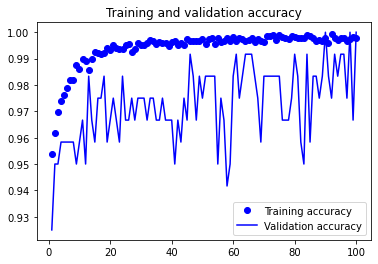

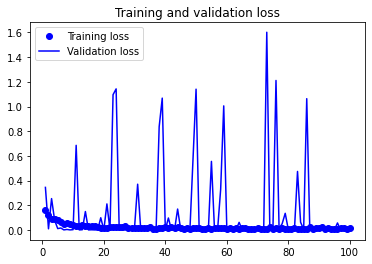

In [75]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

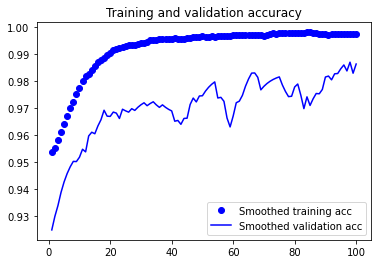

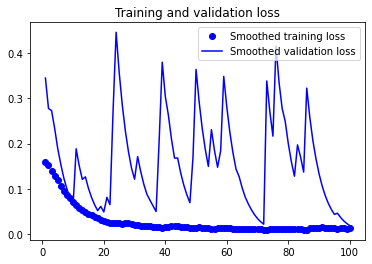

In [76]:
# Smoothed curves
plt.plot(epochs,
 smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
 smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
 smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
 smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()